**Notebook by: Maria J. Molina (NCAR)**

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import staff_module as smodule

In [2]:
# ---- 

# ucar list
all_files = glob.glob("../data/staff_*.csv")
all_files = sorted(all_files)
df_ucar = smodule.open_and_concat(all_files)

# ---- 

# hsi list
all_files = glob.glob("../data/hsi_staff_*.csv")
all_files = sorted(all_files)
df_hsis = smodule.open_and_concat(all_files)

# ---- 

# ehi list
all_files = glob.glob("../data/emerginghsi_staff_*.csv")
all_files = sorted(all_files)
df_ehis = smodule.open_and_concat(all_files)

# ---- 

all_unis = pd.concat([df_ucar, df_hsis, df_ehis])

# ---- 

In [3]:
df = smodule.different_tracks(all_unis)

In [4]:
# --- # ---

df_T_hisptotal = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino total']

df_T_hispwomen_total = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino women']

df_T_hispmen_total = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino men']

# --- # ---

In [5]:
# --- # ---

df_TT_hisptotal  = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino total']

df_TT_hispwomen_total = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino women']

df_TT_hispmen_total = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino men']

# --- # ---

In [6]:
# ----# ----

df_noTT_hisptotal  = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino total']

df_noTT_hispwomen_total = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino women']

df_noTT_hispmen_total = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino men']

# ---- # ---

In [7]:
hisptotal = pd.concat([df_T_hisptotal, df_TT_hisptotal, df_noTT_hisptotal], axis=1)

hispwomen_total = pd.concat([df_T_hispwomen_total, df_TT_hispwomen_total, df_noTT_hispwomen_total], axis=1)

hispmen_total = pd.concat([df_T_hispmen_total, df_TT_hispmen_total, df_noTT_hispmen_total], axis=1)

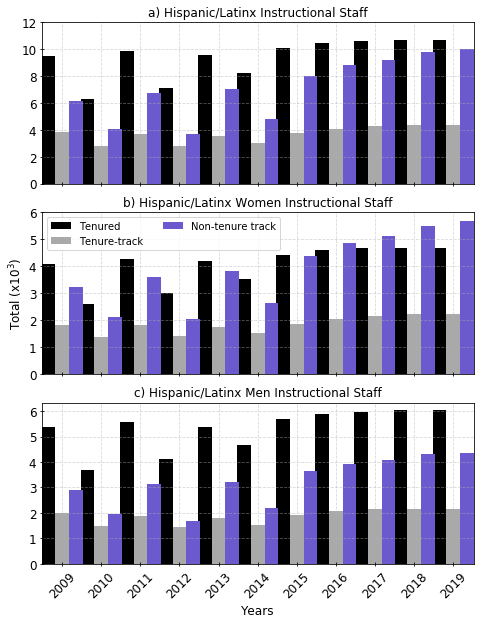

In [8]:
#-----------------------%

fig = plt.figure(figsize=(6.,8.))

#-----------------------%

width = 0.35

#-----------------------%

ax1 = fig.add_axes([0., 0.66, 1., 0.28])
ax1.set_title('a) Hispanic/Latinx Instructional Staff',
              fontsize=12)

l1=ax1.bar(hisptotal.index.values + width, hisptotal.iloc[:,0].values, label='', width=width, color='k')
l2=ax1.bar(hisptotal.index.values + width + width, hisptotal.iloc[:,1].values, label='', width=width, color='darkgrey')
l3=ax1.bar(hisptotal.index.values + width + width + width, hisptotal.iloc[:,2].values, label='', width=width, color='slateblue')

ax1.margins(x=0)
ax1.grid(alpha=0.5,ls='--')

ax1.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax1.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])

ax1.set_yticks([0,2000,4000,6000,8000,10000,12000])
ax1.set_yticklabels([0,2,4,6,8,10,12],fontsize=12)


#-----------------------%

ax3 = fig.add_axes([0., 0.33, 1., 0.28])
ax3.set_title('b) Hispanic/Latinx Women Instructional Staff',
              fontsize=12)

ax3.bar(hispwomen_total.index.values + width, hispwomen_total.iloc[:,0].values, label='', width=width, color='k')
ax3.bar(hispwomen_total.index.values + width + width, hispwomen_total.iloc[:,1].values, label='', width=width, color='darkgrey')
ax3.bar(hispwomen_total.index.values + width + width + width, hispwomen_total.iloc[:,2].values, label='', width=width, color='slateblue')

ax3.margins(x=0)
ax3.grid(alpha=0.5,ls='--')

ax3.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax3.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])

ax3.set_yticks([0,1000,2000,3000,4000,5000,6000])
ax3.set_yticklabels([0,1,2,3,4,5,6],fontsize=12)

ax3.set_ylabel(r"Total (x10$^{3}$)",fontsize=12)
ax3.legend([l1,l2,l3,],['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=2)


#-----------------------%

ax5 = fig.add_axes([0., 0., 1., 0.28])
ax5.set_title('c) Hispanic/Latinx Men Instructional Staff',
              fontsize=12)

ax5.bar(hispmen_total.index.values + width, hispmen_total.iloc[:,0].values, label='', width=width, color='k')
ax5.bar(hispmen_total.index.values + width + width, hispmen_total.iloc[:,1].values, label='', width=width, color='darkgrey')
ax5.bar(hispmen_total.index.values + width + width + width, hispmen_total.iloc[:,2].values, label='', width=width, color='slateblue')

ax5.margins(x=0)
ax5.grid(alpha=0.5,ls='--')
ax5.set_xlabel('Years', fontsize=12)

ax5.tick_params(axis='both',direction='inout',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax5.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])
ax5.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],fontsize=12,rotation=45)

ax5.set_yticks([0,1000,2000,3000,4000,5000,6000])
ax5.set_yticklabels([0,1,2,3,4,5,6],fontsize=12)

#-----------------------%

plt.savefig(f"../figures/fig7.png", bbox_inches='tight', dpi=500)
plt.show()

#-----------------------%